In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from scipy.signal import savgol_filter
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import correlation
from sklearn import datasets, cluster

import glob
import os

plt.style.use('ggplot')

In [2]:
array = [[291.4,3823.2],[605.8,3100.3],[605.8 ,1751.6],[2802.2,3100.3]]
array = pd.DataFrame(array)
d,l = array.shape

In [3]:
path1 = 'D:\\unik\\nauchka\\Cells_aging_raw\\Ethanol_raw.CSV'
path2 = 'D:\\unik\\nauchka\\Cells_aging_raw\\Formalin_raw.CSV'
path3 = 'D:\\unik\\nauchka\\Cells_aging_raw\\Methanol_raw.CSV'
path4 = 'D:\\unik\\nauchka\\Cells_aging_raw\\Pure_raw.CSV'
path22 = 'D:\\unik\\nauchka\\Cells_aging_raw\\formalin2.CSV'

In [4]:
x1 = 294.735504150391
x2 = 3825.27172851562

X1 = pd.read_csv(path1)
X2 = pd.read_csv(path22)
X3 = pd.read_csv(path3)
X4 = pd.read_csv(path4)


In [ ]:
#X1 = X1.loc[:,str(x1):str(x2)]
#X2 = X2.loc[:,str(x1):str(x2)]
#X3 = X3.loc[:,str(x1):str(x2)]
#X4 = X4.loc[:,str(x1):str(x2)]

Перевірка осі Х

In [6]:
Y = pd.read_csv(path1, header=None)
Y = Y.iloc[:, ::-1]
Y.columns  = list(Y.iloc[0, :])
y1 = Y.loc[0,x1:x2]

In [7]:
X1.columns  = y1
X2.columns  = y1
X3.columns  = y1
X4.columns  = y1

In [8]:
X = X1.append(X3)
X = X.append(X4)
X = X.append(X2)

In [9]:
X_ = [X1, X2, X3, X4]

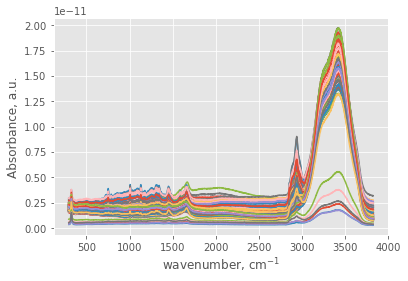

In [10]:
for i in range(len(X)):
    plt.plot(y1, X.iloc[i,:])
plt.xlabel('wavenumber, cm$^{-1}$')
plt.ylabel('Absorbance, a.u.')

name_s = "all spectrum in range {0} {1}.png"
plt.savefig(name_s.format(x1, x2))

plt.show()

## MSC correctionn##

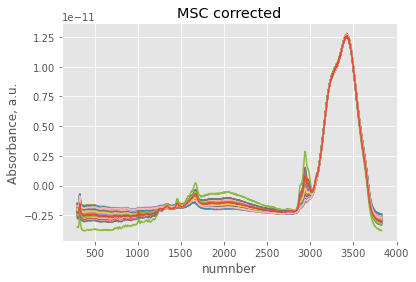

(64, 1340)


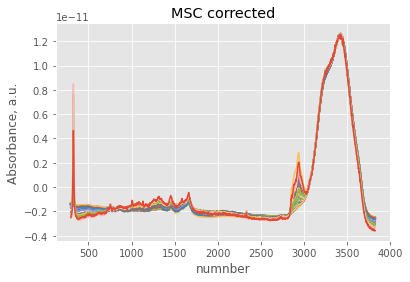

(57, 1340)


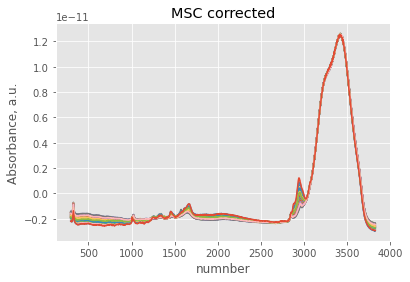

(64, 1340)


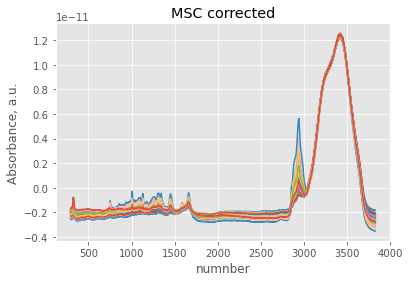

(64, 1340)


In [28]:

def MSC(X):
    X_msc = []
    k = 0
    for data in X:

        nspec, nw = data.shape
        # Perform Multiplicative scatter correction
        # mean centre correction
        for i in range(data.shape[0]):
            data.iloc[i,:] -= data.iloc[i,:].mean()
        # Get the reference spectrum. If not given, estimate it from the mean    
        # Calculate mean
        ref = np.mean(X4, axis=0)
        # Define a new array and populate it with the corrected data    
        data_msc = np.zeros_like(data)
        for i in range(data.shape[0]):
            # Run regression
            fit = np.polyfit(ref, data.iloc[i,:], 1, full=True)
            # Apply correction
            data_msc[i,:] = (data.iloc[i,:] - fit[0][1]) / fit[0][0] 

        for i in range(nspec):
            plt.plot(y1, data_msc[i,:])
        plt.xlabel('numnber')
        plt.ylabel('Absorbance, a.u.')
        plt.title('MSC corrected')
        plt.show()
        #np.vstack((X_msc, data_msc))
        X_[k] = data_msc
        k+=1

        print(data_msc.shape)
MSC(X_)

In [14]:
#X = X_msc


In [15]:
label = cluster.AgglomerativeClustering(
            n_clusters=8, 
            affinity='correlation', 
            linkage='average'
        ).fit(X).labels_

In [16]:
n_clusters = np.unique(label).shape[0]
X['labels'] = label
labels_mean = X.groupby(['labels']).mean()

In [17]:
np.unique(label)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [18]:
labels1 = label[0:64]
labels2 = label[192:240]
labels3 = label[64:128]
labels4 = label[128:192]
labels_arr = {'ethanol':labels1, 'formalin':labels2, 'methanol':labels3, 'pure':labels4}
y1.index = y1

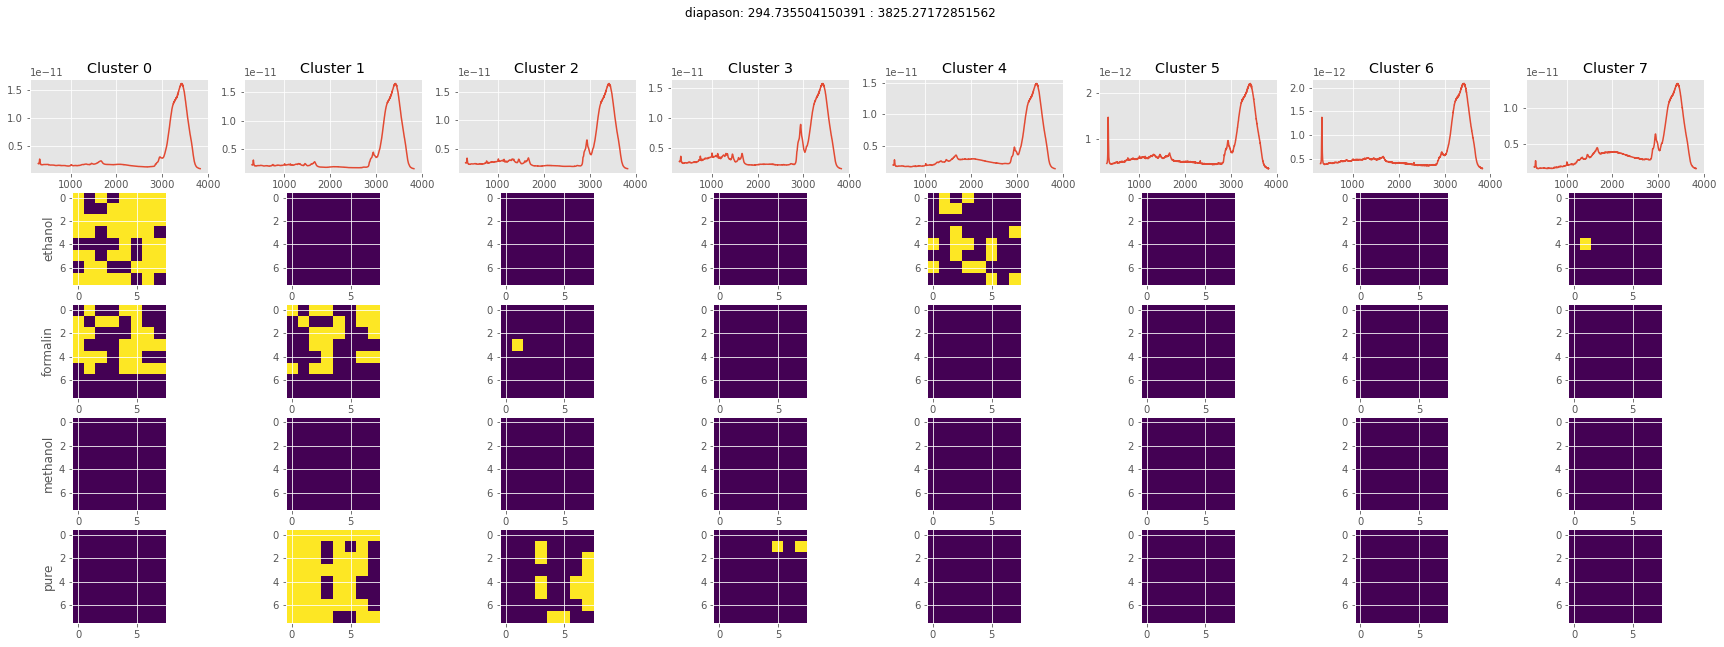

In [19]:
def dich(n, hight, width, material_n, labels_arr):
    
    fig, axes = plt.subplots(nrows=material_n+1, ncols=n_clusters, figsize=(30,10))
    plt.suptitle("diapason: " + str(x1) + " : " + str(x2))
        
    for i in range(n_clusters):
        axes[0,i].set(title = "Cluster " + str(i))
        axes[0,i].plot(y1, labels_mean.iloc[i])
        
    k=1
    for key in labels_arr:
            
        for i in range(n_clusters):
            cl = np.zeros(n)
                
            for j in range(len(labels_arr[key])):
                if i == labels_arr[key][j]:
                    cl[j] = 1
                R = np.reshape(cl, (hight, width))
                axes[k,i].imshow(R)
            axes[k,0].set_ylabel(key)
        k+=1
            
    plt.show()
    name = "Clasters in range {0} {1}.png"
    fig.savefig(name.format(x1, x2))
dich(64, 8, 8, 4, labels_arr)